# Cities ROI Analysis

Here we will model the ROIs by City to determine what cities would be best for the companies expansion goals.

In [1]:
# Import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statistics import mean, median
import warnings

# function specific libraries
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

#import custom functions
import src.timeseries_project as ts

---------------------------------

In [2]:
# Importing the master data sets

raw = pd.read_csv("../00_Source_Data/zillow_data.csv")

zips = pd.read_csv('../Data/Zips.csv')
cities = pd.read_csv('../Data/Cities.csv')
counties = pd.read_csv("../Data/Counties.csv")
metros = pd.read_csv("../Data/Metros.csv")
states = pd.read_csv("../Data/States.csv")

In [3]:
# Set date as index
zips = ts.set_index(zips, 'Date')
cities = ts.set_index(cities, 'Date')
counties = ts.set_index(counties, 'Date')
metros = ts.set_index(metros, 'Date')
states = ts.set_index(states, 'Date')

In [4]:
locators = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

-----

## City Selection

Selecting cities manually by max of most recent ROI

Process:
   1. Select State
   2. Isolate Metros in selected state from time series
   3. Select Metro
   4. Isolate Counties in selected metro from time series
   5. Select County
   6. Isolate Cities in selected county from time series
   7. Select top 5 Cities

In [5]:
state = states.idxmax(axis=1).tail(1)[0]
state

'DE'

Delaware has the highest most recent ROI, so we'll look at metros in Delaware.

In [6]:
# processing raw data to pull DE data out:
DE_df = raw[raw['State'] == 'DE']

# Pull and format metros
DE_metros = DE_df.drop(columns= ts.without(locators, 4))
DE_metros = ts.format_df(DE_metros)
DE_metros = ts.get_qroi(DE_metros)

for i in DE_metros.columns:
    DE_metros[i] = ts.stationizer(DE_metros[i].dropna(), 12, verbose=False)

DE_metros = ts.fix_na(DE_metros)

ts.get_na(DE_metros)

In [7]:
metro = DE_metros.idxmax(axis=1).tail(1)[0]
metro

'Philadelphia'

Philadelphia has the highest most recent ROI so we'll look at counties in Philadelphia.

In [8]:
# processing raw data to pull Philadelphia data out:
phili_df = DE_df[DE_df['Metro'] == 'Philadelphia']

# Pull and format metros
phili_cnty = phili_df.drop(columns= ts.without(locators, 5))
phili_cnty = ts.format_df(phili_cnty)
phili_cnty = ts.get_qroi(phili_cnty)

for i in phili_cnty.columns:
    phili_cnty[i] = ts.stationizer(phili_cnty[i].dropna(), 12, verbose=False)

phili_cnty = ts.fix_na(phili_cnty)

ts.get_na(phili_cnty)

phili_cnty.tail(1)

CountyName,New Castle
Date,
2018-04-01,0.032271


New Castle County is the only county we have data for in the Philidelphia metro, so.

In [9]:
# processing raw data to pull Philadelphia data out:
phili_cities = DE_df[DE_df['CountyName'] == 'New Castle']

# Pull and format metros
phili_top5 = phili_cities.drop(columns= ts.without(locators, 2))
phili_top5 = ts.format_df(phili_top5)
phili_top5 = ts.get_qroi(phili_top5)

for i in phili_top5.columns:
    phili_top5[i] = ts.stationizer(phili_top5[i].dropna(), 12, verbose=False)

phili_top5 = ts.fix_na(phili_top5)

ts.get_na(phili_top5)

In [10]:
cit5 = phili_top5.T.nlargest(columns = pd.to_datetime('2018-04'), n = 5).T
cit5

City,Bear,Claymont,Wilmington,Newport,New Castle
Date,,,,,
1996-04-01,0.012793,-0.003204,-0.005011,-0.001833,-0.005490
1996-05-01,0.012793,-0.003204,-0.005011,-0.001833,-0.005490
1996-06-01,0.012793,-0.003204,-0.005011,-0.001833,-0.005490
1996-07-01,0.012712,-0.003204,-0.005011,-0.001833,-0.005490
1996-08-01,0.011930,-0.003204,-0.005011,-0.001833,-0.005490
...,...,...,...,...,...
2017-12-01,0.057723,0.039308,0.064379,0.043249,0.047729
2018-01-01,0.044926,0.019180,0.050621,0.032951,0.034057
2018-02-01,0.015431,-0.006224,0.006839,0.004951,-0.001110


## Model 0

In [11]:
# We will use 20% of the most recent data as a test set
cutoff = round(cit5.shape[0]*0.8)

# splitting train and test
train = cit5[:cutoff]
test = cit5[cutoff:]

In [12]:
# Shifting data as Naive Baise for base model
naive = train.shift(1).fillna(value=None, method='backfill', axis=None, limit=None, downcast=None);

In [13]:
mean_squared_error(train, naive, squared=False)

0.0033050625200495417

In [14]:
naive_test = test.shift(1).fillna(value=None, method='backfill', axis=None, limit=None, downcast=None);

mean_squared_error(test, naive_test, squared=False)

0.01028287446962833

The base model (model 0) is a shifted model that uses the previous month's average ROI as the predicted ROI for the following month. The Root Mean Squared Error (RMSE) for the test on this model returned a value of:

0.0103 or 1.03% variation on ROI

-----

## Model 1 - Basic ARIMA

In [15]:
# train test split at 80%

# We will use 20% of the most recent data as a test set
cutoff = round(cit5.shape[0]*0.8)

# splitting train and test
train = cit5[:cutoff]
test = cit5[cutoff:]

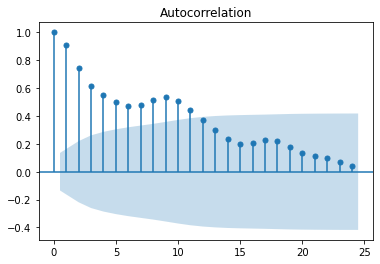

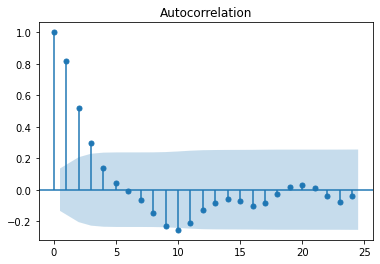

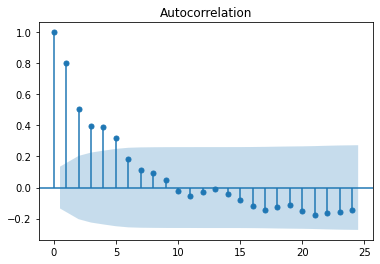

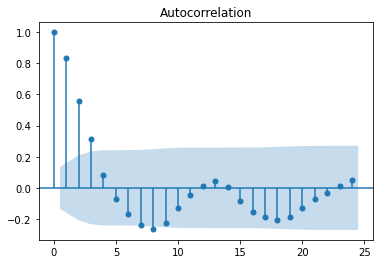

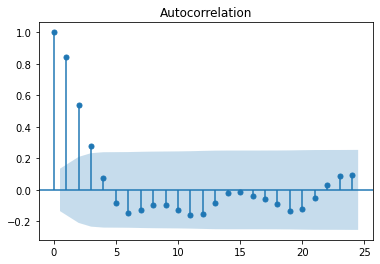

In [16]:
for i in train.columns:
    plot_acf(train[i])

No handles with labels found to put in legend.


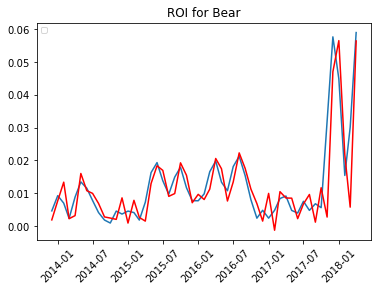

RMSE: 0.006657569440596663


No handles with labels found to put in legend.


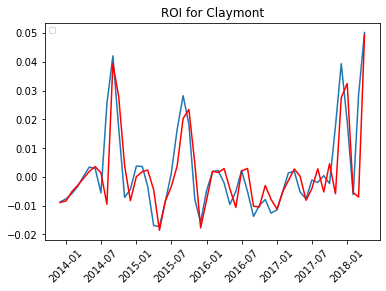

RMSE: 0.009381431702703384


No handles with labels found to put in legend.


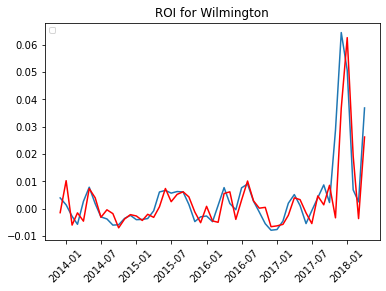

RMSE: 0.0073236986550742934


No handles with labels found to put in legend.


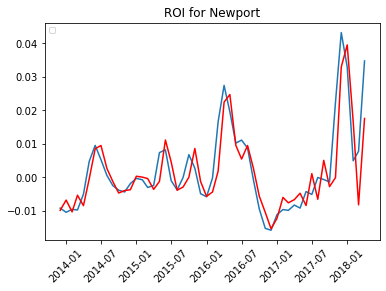

RMSE: 0.006467666551018817


No handles with labels found to put in legend.


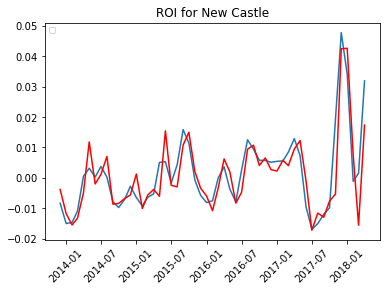

RMSE: 0.006413621020047254


In [17]:
warnings.filterwarnings("ignore")

# Performs a walk-forward validation on ARIMA tests for each column in the dataframe
# and returns a mean RMSE for the model

mean_RMSE = ts.Multi_ARIMA(train, test, (5,0,0), plot=True)

warnings.filterwarnings("default")

In [18]:
mean_RMSE

(0.007248797473888082,)

Our RMSE for our ARIMA model has an error of 0.00725, or a variation in ROI of approximately 0.73%

### Visualization of data and forecasting

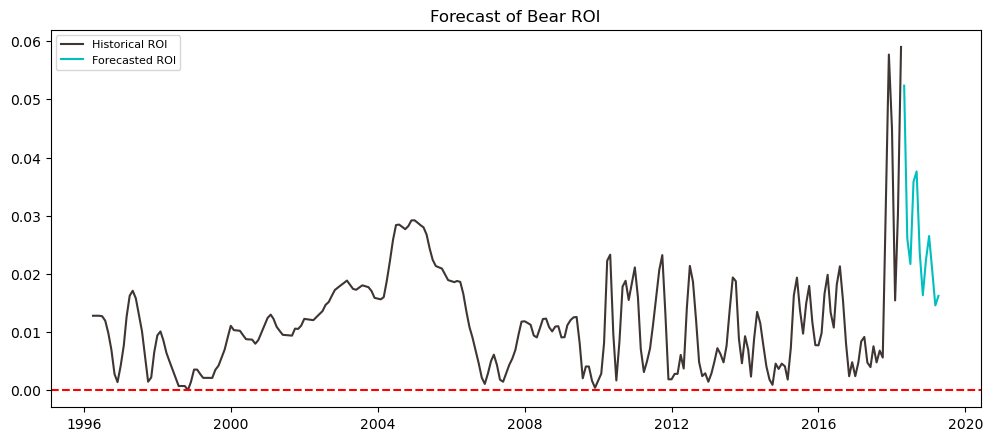

Mean ROI over next quarter: 0.03401230316997059
Median ROI over next quarter: 0.030988017204207557


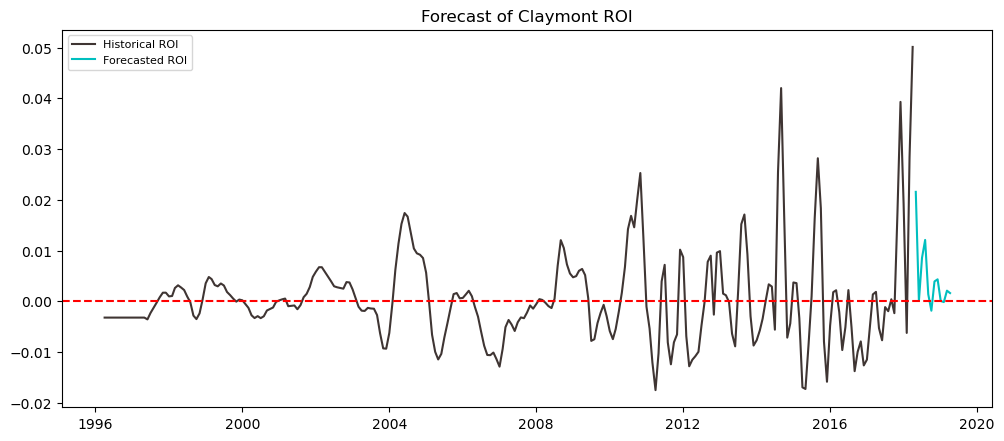

Mean ROI over next quarter: 0.010584864665976104
Median ROI over next quarter: 0.01033959523325057


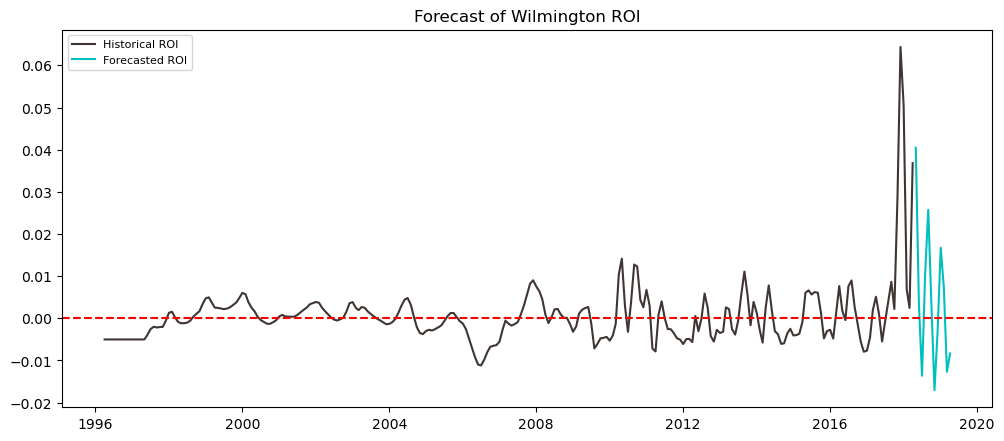

Mean ROI over next quarter: 0.010198112061180034
Median ROI over next quarter: 0.006960109714783964


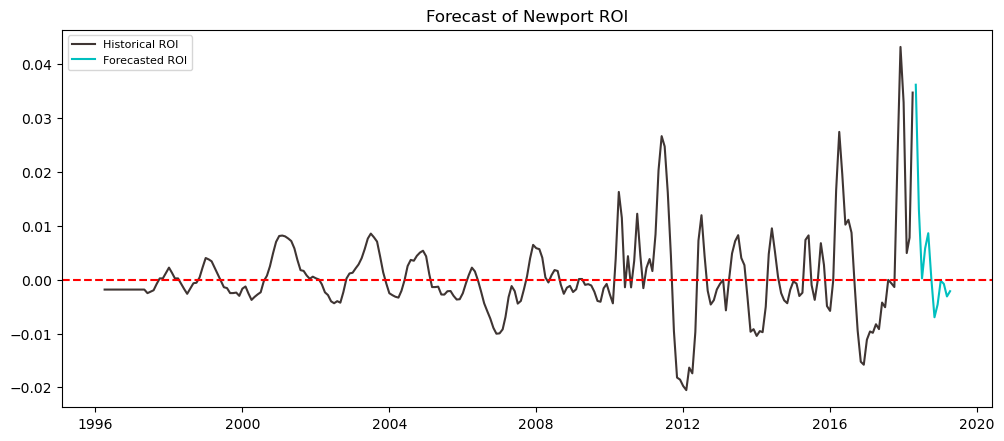

Mean ROI over next quarter: 0.013820078674109927
Median ROI over next quarter: 0.009403265767392109


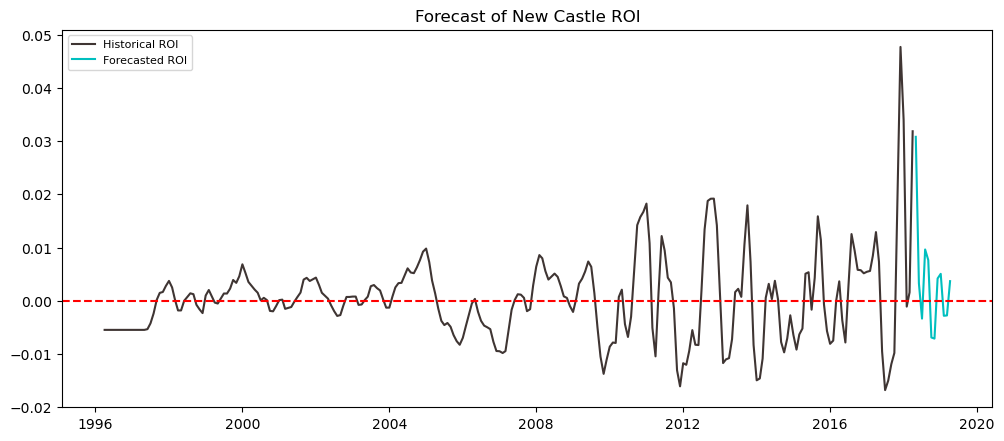

Mean ROI over next quarter: 0.0100875318094514
Median ROI over next quarter: 0.0064499392317981285


In [19]:
warnings.filterwarnings("ignore")


for i in cit5.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(cit5[i])
    index = cit5[i].index
    tmpdf = cit5[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(cit5[i], label='Historical ROI', color = '#3f3533' )
    #plt.plot(pd.DataFrame(history).set_index(tmpdf.index), label='Forecasted ROI')
    plt.plot(pd.DataFrame(predictions, index = tmpdf.tail(12).index), label='Forecasted ROI', color = 'c')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Forecast of {i} ROI')
    plt.legend(loc='upper left', fontsize=8)
    plt.savefig(f'../Figures/model1_{i}_ROI.png', bbox_inches='tight', transparent=True)
    plt.show();
    
    print(f'Mean ROI over next quarter: {mean(predictions[:4])}')
    print(f'Median ROI over next quarter: {median(predictions[:4])}')

warnings.filterwarnings("default")

### Evaluation

While this model performs well for the chosen cities. We feel that the selection of process can be better performed using predictive modeling than by the maximum previous ROI.

------

## Model 2 - Tiered Approach

We will attempt to perform the same modeling process in model 1 at higher tiers to create a tiered selection method for the best forecasted locations.

In [20]:
state_names = states.columns.to_list()
mean_rois = []

for i in states.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(states[i])
    index = states[i].index
    tmpdf = states[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t
    #print(f'Mean ROI of {i} for 1 year: {mean(predictions)}')
    mean_rois.append(mean(predictions))

states_by_roi = dict(zip(state_names, mean_rois))

C:\Users\bjere\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
choice_states = sorted(states_by_roi, key=states_by_roi.get, reverse=True)[:5]
choice_states

['DE', 'NV', 'FL', 'AL', 'UT']

Top 5 states are DE, NV, FL, AL, UT by projected ROI

In [22]:
metros_selection = raw[raw['State'].isin(choice_states)]

# Pull and format metros
metros_selection = metros_selection.drop(columns= ts.without(locators, 4))
metros_selection = ts.format_df(metros_selection)
metros_selection = ts.get_qroi(metros_selection)

for i in metros_selection.columns:
    metros_selection[i] = ts.stationizer(metros_selection[i].dropna(), 12, verbose=False)

metros_selection = ts.fix_na(metros_selection)

ts.get_na(metros_selection)

In [23]:
metro_names = metros_selection.columns.to_list()
mean_rois = []

for i in metros_selection.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(metros_selection[i])
    index = metros_selection[i].index
    tmpdf = metros_selection[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t
    #print(f'Mean ROI of {i} for 1 year: {mean(predictions)}')
    mean_rois.append(mean(predictions))

metros_by_roi = dict(zip(metro_names, mean_rois))

C:\Users\bjere\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
choice_metros = sorted(metros_by_roi, key=metros_by_roi.get, reverse=True)[:5]
choice_metros

['Cullman', 'Panama City', 'Daphne', 'Arcadia', 'Pahrump']

'Cullman', 'Panama City', 'Daphne', 'Arcadia', 'Pahrump' are the top five metros by projected ROI

In [25]:
county_selection = raw[raw['Metro'].isin(choice_metros)]

# Pull and format
county_selection = county_selection.drop(columns= ts.without(locators, 5))
county_selection = ts.format_df(county_selection)
county_selection = ts.get_qroi(county_selection)

for i in county_selection.columns:
    county_selection[i] = ts.stationizer(county_selection[i].dropna(), 12, verbose=False)

county_selection = ts.fix_na(county_selection)

ts.get_na(county_selection)

In [26]:
county_names = county_selection.columns.to_list()
mean_rois = []

for i in county_selection.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(county_selection[i])
    index = county_selection[i].index
    tmpdf = county_selection[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t
    #print(f'Mean ROI of {i} for 1 year: {mean(predictions)}')
    mean_rois.append(mean(predictions))

counties_by_roi = dict(zip(county_names, mean_rois))

C:\Users\bjere\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
choice_counties = sorted(counties_by_roi, key=counties_by_roi.get, reverse=True)[:5]
choice_counties

['Cullman', 'Gulf', 'Baldwin', 'De Soto', 'Nye']

'Cullman', 'Gulf', 'Baldwin', 'De Soto', 'Nye' are the counties with the highest projected ROIs

In [28]:
city_selection = raw[raw['CountyName'].isin(choice_counties)]

# Pull and format
city_selection = city_selection.drop(columns= ts.without(locators, 2))
city_selection = ts.format_df(city_selection)
city_selection = ts.get_qroi(city_selection)

for i in city_selection.columns:
    city_selection[i] = ts.stationizer(city_selection[i].dropna(), 12, verbose=False)

city_selection = ts.fix_na(city_selection)

ts.get_na(city_selection)

In [29]:
city_names = city_selection.columns.to_list()
mean_rois = []

for i in city_selection.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(city_selection[i])
    index = city_selection[i].index
    tmpdf = city_selection[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t
    #print(f'Mean ROI of {i} for 1 year: {mean(predictions)}')
    mean_rois.append(mean(predictions))

cities_by_roi = dict(zip(city_names, mean_rois))

C:\Users\bjere\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
choice_cities = sorted(cities_by_roi, key=cities_by_roi.get, reverse=True)[:5]
choice_cities

['Logan', 'Port Saint Joe', 'Foley', 'Fairhope', 'Stapleton']

Above are the top five cities by projected ROI. We will now perform a forecasting for each city and visualize the resulting ROIs.

In [31]:
cit5 = raw[raw['City'].isin(choice_cities)]

# Pull and format
cit5 = cit5.drop(columns= ts.without(locators, 2))
cit5 = ts.format_df(cit5)
cit5 = ts.get_qroi(cit5)

for i in cit5.columns:
    cit5[i] = ts.stationizer(cit5[i].dropna(), 12, verbose=False)

cit5 = ts.fix_na(cit5)

ts.get_na(cit5)

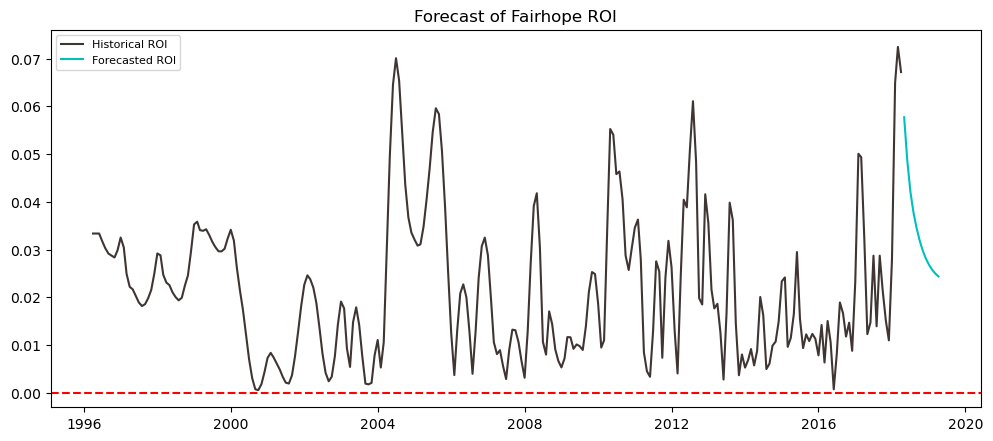

Mean ROI over next quarter: 0.04657231051280349
Median ROI over next quarter: 0.04540611806131807


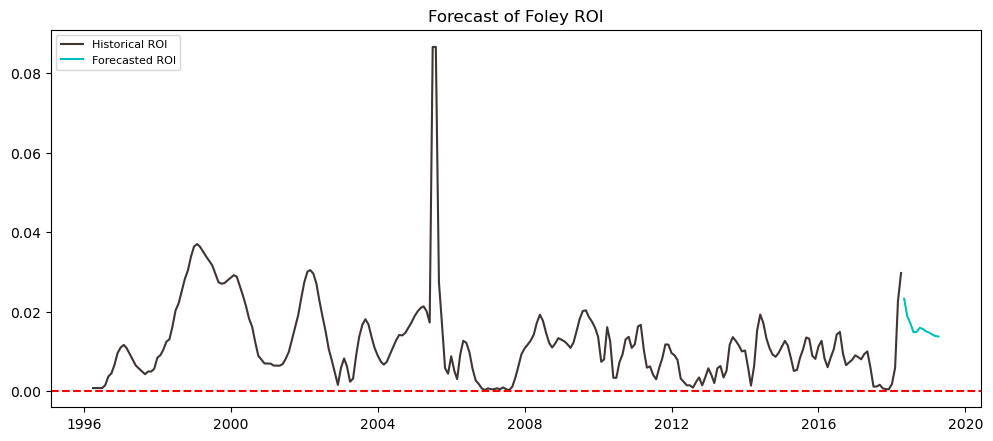

Mean ROI over next quarter: 0.01846720218052919
Median ROI over next quarter: 0.017913482509945945


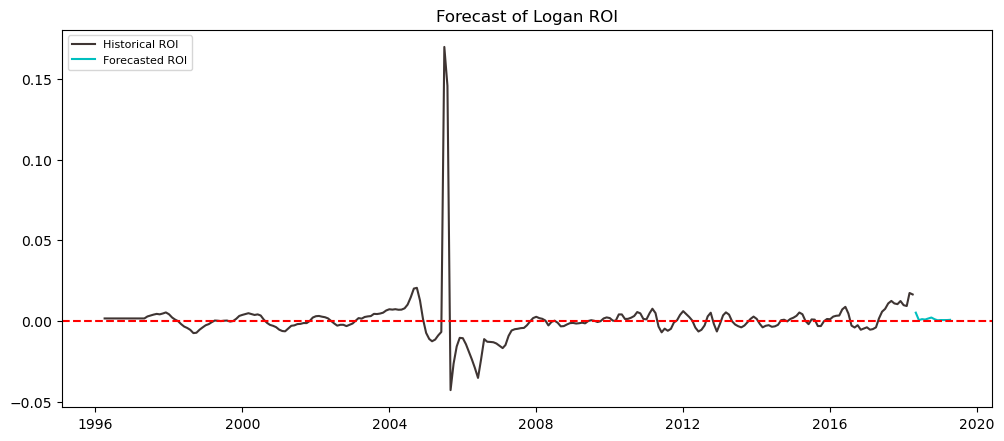

Mean ROI over next quarter: 0.0018966896181822567
Median ROI over next quarter: 0.000984112664520336


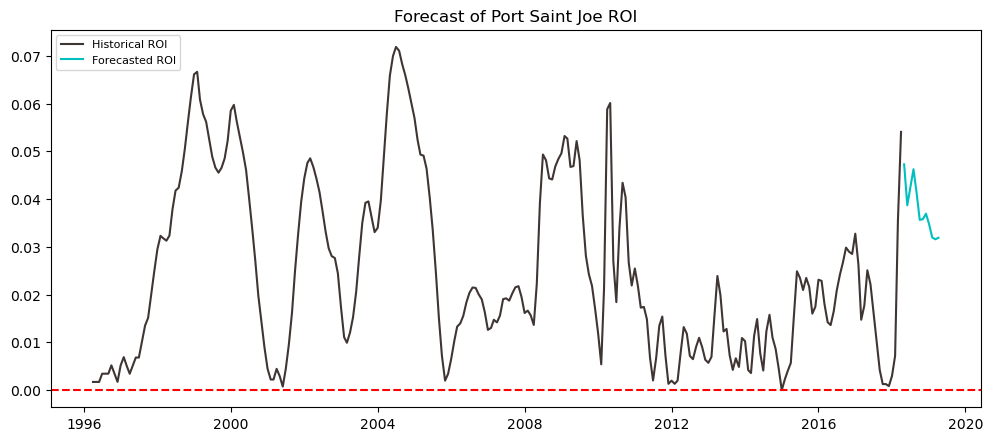

Mean ROI over next quarter: 0.04369534717409218
Median ROI over next quarter: 0.04439236040744626


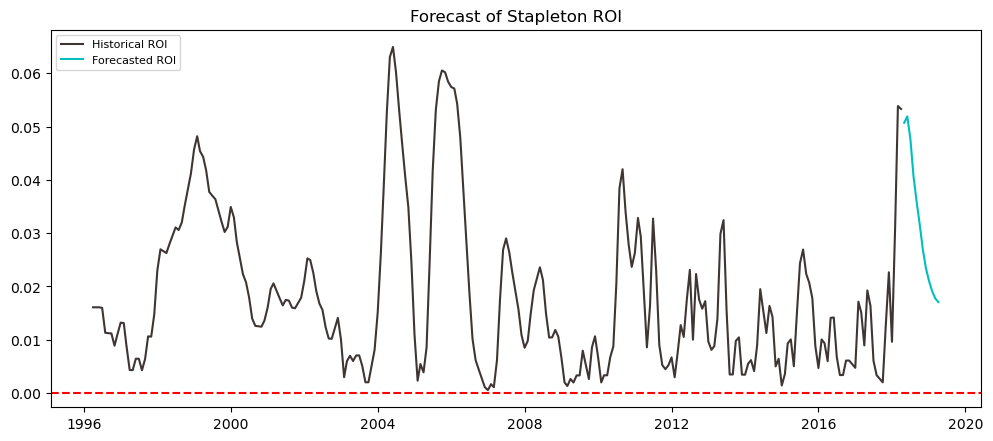

Mean ROI over next quarter: 0.047734517834787944
Median ROI over next quarter: 0.049174681310534825


In [32]:
warnings.filterwarnings("ignore")


for i in cit5.columns:
    # walk-forward forecast
    predictions = []
    history = np.asarray(cit5[i])
    index = cit5[i].index
    tmpdf = cit5[i]
    for t in range(12):
        model = ARIMA(history, order=(5,0,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history = np.append(history, yhat)
        idx = tmpdf.tail(1).index[0] + pd.Timedelta(days=31)
        tmpdf.loc[idx] = t

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(cit5[i], label='Historical ROI', color = '#3f3533' )
    #plt.plot(pd.DataFrame(history).set_index(tmpdf.index), label='Forecasted ROI')
    plt.plot(pd.DataFrame(predictions, index = tmpdf.tail(12).index), label='Forecasted ROI', color = 'c')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Forecast of {i} ROI')
    plt.legend(loc='upper left', fontsize=8)
    plt.savefig(f'../Figures/model2_{i}_ROI.png', bbox_inches='tight', transparent=True)
    plt.show();
    
    print(f'Mean ROI over next quarter: {mean(predictions[:4])}')
    print(f'Median ROI over next quarter: {median(predictions[:4])}')

warnings.filterwarnings("default")

While the results of this model also vary. The highest valued projected ROI for the next quarter of 5% in Stapleton is higher than our previous model's estimation in Bear.

This shows that while the concept of our model functions properly, the application of tiered data provides better results while reducing the computational load required to run the model on all cities without a tiered filtering system.

Because the underlying model itself is the same as model1 we expect the RMSE of this model to be approximately the same as the first model.

For future models of this type, we would like to try an auto-arima model function that varies the hyperparameters as needed for each iteration the model is run. We expect a model run this way to be more accurate with its results, but we do not expect the resulting outcome to change significantly.